# Импорт библиотек

In [1]:
import numpy as np
import copy 

# Алгоритм

In [2]:
def psi(x, y, alpha=0.0):
    """
    Функция линии тока
    """
    alpha = np.deg2rad(alpha)
    return np.cos(alpha) * y - np.sin(alpha) * x

In [3]:
def plastina(array, px, py, P):
    """
    Вычисляет значение функции тока на пластине

    Параметры:
        array - массив размерности (NX,NY) 
        NX, NY - количество шагов разбиения по оси OX, OY
        px, py - координаты точек пластины
        P - количество точек
    """

    arr = copy.deepcopy(array)

    a = 0
    k = py
    for p in range(P):
        k += 1
        a += arr[k, px]
    
    a /= float(P)

    k = py
    for p in range(P):
        k += 1
        arr[k, px] = a  

    return arr

def kernel(array, NX, NY, px, py, P):
    """
    Вычисляет ядро

    Параметры:
        array - массив размерности (NX,NY) 
        NX, NY - количество шагов разбиения по оси OX, OY
        px, py - координаты точек пластины
        P - количество точек
    """
    arr = copy.deepcopy(array)
    # Внутренние точки
    for i in range(1, NX-1):
        for j in range(1, NY-1):
            arr[i,j] = (arr[i-1, j] + arr[i+1, j] + arr[i, j-1] + arr[i, j+1]) / 4.0
    # Бок
    for i in range(1, NY):
        arr[i, NX-1] = 2.0 * arr[i, NX-1-1] - arr[i, NX-1-2] 

    # Потолок
    for j in range(1, NX):
        arr[NY-1, j] = 2.0 * arr[NY-1-1, j] - arr[NY-1-2, j]

    arr = plastina(arr, px, py, P)

    return arr

In [4]:
def calculate_init_cond(array, xx, yy, alpha):
    """
    Вычисляет первое приближение

    Принимает:
        - field:array - вычислительную область
        - psi:function - функция, описывающая начальные условия
        - x, y:array - векторы координат
    Возвращает:
        - :array - вычислительную область с граничными условиями
    """
    arr = copy.deepcopy(array)
    arr = psi(xx, yy, alpha)
    return arr

In [5]:
def calculate_psi(psi_prev, NX, NY, px, py, P, ITER=1000, eps=0.001):
    """
    Основной алгоритм для вычисления пси

    Параметры:
        psi_prev - массив начальных приближений размерности (NX,NY) 
        NX, NY - количество шагов разбиения по оси OX, OY
        px, py - координаты точек пластины
        P - количество точек
        ITER - количество итераций
        eps - погрешность
    """
    delta = []

    for iter in range(1000):
        psi_now = kernel(psi_prev, NX, NY, px=px, py=py, P=P)
        delta_ = np.max(np.abs(psi_now - psi_prev))

        if iter % 10 == 0:
            print(f'iter {iter:5}\teps {delta_:.5f}')

        psi_prev = copy.deepcopy(psi_now)
        delta.append(delta_)
        
        if delta_ < eps: 
            print(f"\nРасчет окончен на {iter} итерации")
            break

    return psi_now, delta

# Подготовка вычислительной области

In [6]:
X, Y = 10.0, 10.0
NX, NY = 200, 200
px, py = NX // 2, NY // 3
P = NY - 2 * py
eps = 0.001

x = np.linspace(0, X, NX)
y = np.linspace(0, Y, NY)

xx, yy = np.meshgrid(x,y)

alpha = 30
z = np.zeros(xx.shape)
z = calculate_init_cond(z, xx, yy, alpha)

psi_prev = copy.deepcopy(z)

In [7]:
psi_now, delta = calculate_psi(psi_prev, NX, NY, px, py, P, ITER=1000, eps=eps)

iter     0	eps 1.45788
iter    10	eps 0.03498
iter    20	eps 0.01520
iter    30	eps 0.00940
iter    40	eps 0.00670
iter    50	eps 0.00512
iter    60	eps 0.00410
iter    70	eps 0.00341
iter    80	eps 0.00291
iter    90	eps 0.00252
iter   100	eps 0.00222
iter   110	eps 0.00198
iter   120	eps 0.00178
iter   130	eps 0.00161
iter   140	eps 0.00147
iter   150	eps 0.00135
iter   160	eps 0.00125
iter   170	eps 0.00116
iter   180	eps 0.00108
iter   190	eps 0.00101

Расчет окончен на 193 итерации


In [8]:
import matplotlib.pyplot as plt

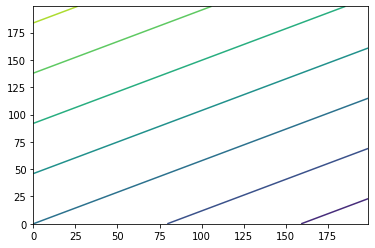

In [9]:
plt.contour(z)

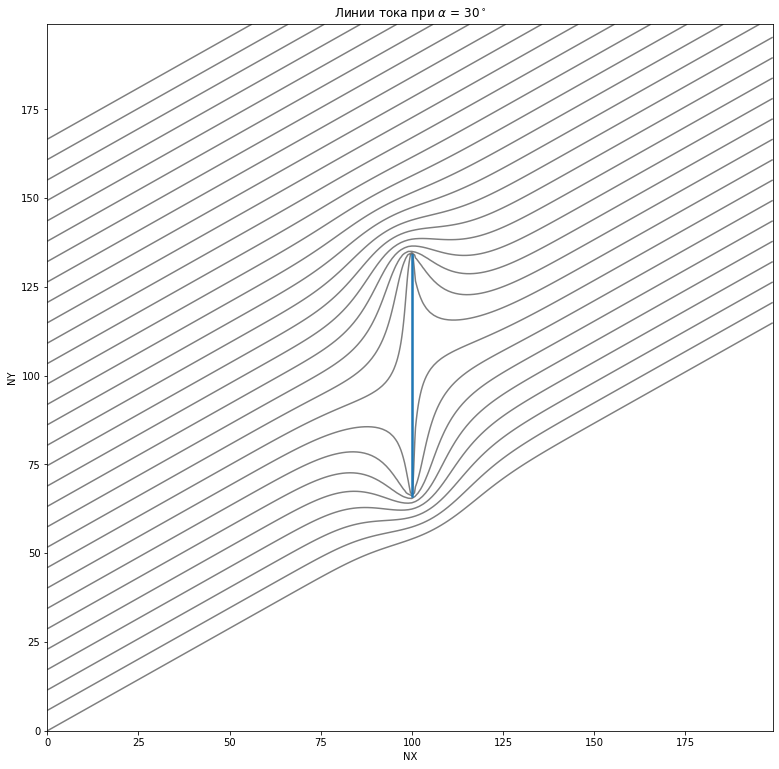

In [10]:
fig,ax = plt.subplots(figsize=(13,13))
contourf_ = ax.contour(psi_now, [ i * 0.25 for i in range(30) ], colors='k', alpha=0.5)
ax.plot([px, px], [py, py+P], lw=2.5) 

ax.set_xlabel('NX')
ax.set_ylabel('NY')
ax.set_title(r'Линии тока при $\alpha$ = {}$^\circ$'.format(alpha));

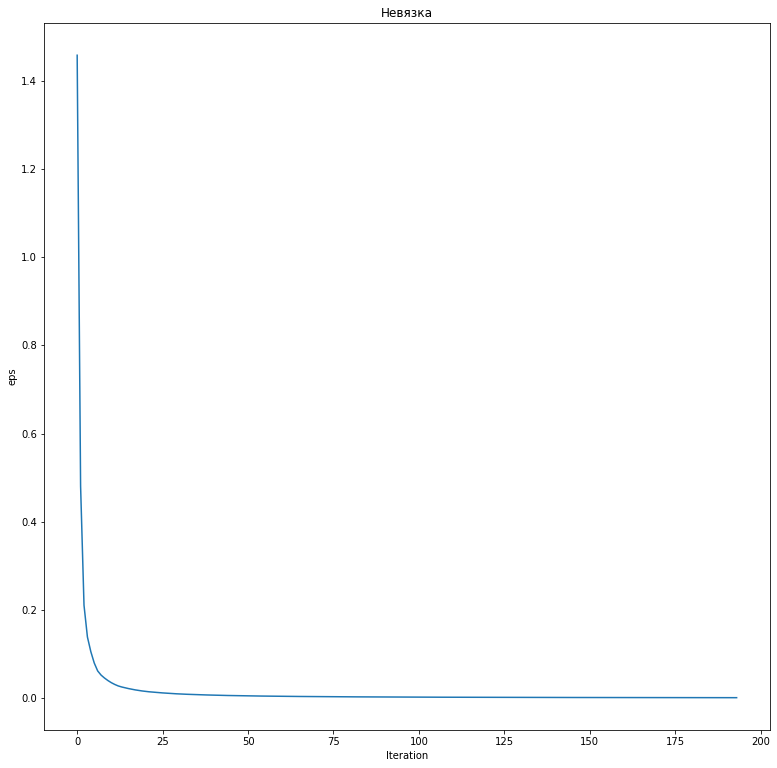

In [11]:
fig,ax = plt.subplots(figsize=(13,13))
ax.plot(delta)

ax.set_xlabel('Iteration')
ax.set_ylabel('eps')
ax.set_title('Невязка');